In [705]:
import pandas as pd
import numpy as np
#
from sklearn.neural_network import MLPClassifier # Multi Layer Perceptron
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.naive_bayes import MultinomialNB
#
from sklearn.metrics import confusion_matrix # For presentation of model
from sklearn.metrics import ConfusionMatrixDisplay
#
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold # For implementation of cross-validation generalisation
#
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
#
from sklearn.metrics import classification_report # For creation of precision, recall and f1-measures
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
#
from sklearn.ensemble import VotingClassifier,RandomForestClassifier,GradientBoostingClassifier # For Ensemble Learning

# Importing the dataset
Pandas library have been used to import data. Also the dataframe presented with some information tables to be used in preprocessing part.

In [697]:
df = pd.read_csv('bank-full.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes


In [698]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# 1-Preprocessing data
Dataset contains many features, but not all of them are practical. Some columns do not have significant changes in values. It does not help to improve the quality of model and final score. Also there are some features which have been quantified with string values that are not considerable by the machine. These features turned to boolean type features to make them understandable for machine. In addition, categorical data such as 'job' feature quantified with multiple categories. These categories defined as new columns in dataset as boolean features to making them understandable for machine. 'pdays' nad 'previous' is correlated strongly, so these two values also should be removed.

In [689]:
df = df.drop(df.columns[[12,13,15,16,17,18,19]], axis=1)

In [690]:
df['default'] = df['default'].apply(lambda x: 1 if x == 'yes' else 0)
df['housing'] = df['housing'].apply(lambda x: 1 if x == 'yes' else 0)
df['loan'] = df['loan'].apply(lambda x: 1 if x == 'yes' else 0)
df['contact'] = df['contact'].apply(lambda x: 1 if x == 'telephone' else 0)
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [691]:
df = pd.get_dummies(df, columns=['job'], prefix='J')
df = pd.get_dummies(df, columns=['marital'], prefix='M')
df = pd.get_dummies(df, columns=['poutcome'], prefix='P')
df = pd.get_dummies(df, columns=['education'], prefix='E')
df = pd.get_dummies(df, columns=['day_of_week'], prefix='D')
df = pd.get_dummies(df, columns=['month'], prefix='O')

df

,age,default,housing,loan,contact,duration,campaign,y,J_admin.,J_blue-collar,...,O_apr,O_aug,O_dec,O_jul,O_jun,O_mar,O_may,O_nov,O_oct,O_sep
0,56,0,0,0,1,261,1,0,False,False,...,False,False,False,False,False,False,True,False,False,False
1,57,0,0,0,1,149,1,0,False,False,...,False,False,False,False,False,False,True,False,False,False
2,37,0,1,0,1,226,1,0,False,False,...,False,False,False,False,False,False,True,False,False,False
3,40,0,0,0,1,151,1,0,True,False,...,False,False,False,False,False,False,True,False,False,False
4,56,0,0,1,1,307,1,0,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0,1,0,0,334,1,1,False,False,...,False,False,False,False,False,False,False,True,False,False
41184,46,0,0,0,0,383,1,0,False,True,...,False,False,False,False,False,False,False,True,False,False
41185,56,0,1,0,0,189,2,0,False,False,...,False,False,False,False,False,False,False,True,False,False
41186,44,0,0,0,0,442,1,1,False,False,...,False,False,False,False,False,False,False,True,False,False


### 1.2-Splitting data to train and test
first 30000 of rows of data considered as the training data and the rest of them considered as testing data. Label column 'y' is used to evaluate the predication value for each datapoint. This column has been removed from the training and testing process, so it will be used for evaluation of the predictions.

In [692]:
Train = df.iloc[0:30000,:]
Test = df.iloc[30000:,:]

In [445]:
x_Train = Train.drop('y', axis=1)
y_Train = Train['y']

x_Test = Test.drop('y', axis=1)
y_Test = Test['y']
x_Train

,age,default,housing,loan,contact,duration,campaign,J_admin.,J_blue-collar,J_entrepreneur,...,O_apr,O_aug,O_dec,O_jul,O_jun,O_mar,O_may,O_nov,O_oct,O_sep
0,56,0,0,0,1,261,1,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,57,0,0,0,1,149,1,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,37,0,1,0,1,226,1,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,40,0,0,0,1,151,1,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,56,0,0,1,1,307,1,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,20,0,1,1,0,47,2,False,False,False,...,True,False,False,False,False,False,False,False,False,False
29996,47,0,0,0,0,645,2,False,False,False,...,True,False,False,False,False,False,False,False,False,False
29997,34,0,0,0,0,446,1,True,False,False,...,True,False,False,False,False,False,False,False,False,False
29998,34,0,1,0,0,121,1,True,False,False,...,True,False,False,False,False,False,False,False,False,False


### 1.3-Normalization of data
Used Standard Scalar and SMOTE to Normalizing data. It is important to use normalization and the reason is that normalization make sure that all features have similar values (Vinod Kumar 2024). Normalization of a dataset is a common activity different ML problems..

In [446]:
scalar = StandardScaler()
scalar.fit(x_Train)
X_train_scaled=scalar.transform(x_Train)
X_test_scaled=scalar.transform(x_Test)

smote = SMOTE(random_state=42)
X_train_scaled, y_Train = smote.fit_resample(X_train_scaled, y_Train)

# 2-Models

### 2.1-SVM
GridSearchCV method has been used to implement cross-validation technique over SVM model to divide data to different slices and train all data and compare it with each slice everytime. A collection of values has been assigned to test all values into the model. GridSearchCV apply all combination of values given to the method to output the best score and best parameter estimator model.

In [706]:
parameter_grid = {
    "kernel": ["sigmoid", "rbf"],
    "C": [2,5],
    "gamma": [0.01,0.5]
}

inner_cv = KFold(n_splits=2,shuffle=True,random_state=42)
outer_cv = KFold(n_splits=2,shuffle=True,random_state=42)

classifier = GridSearchCV(estimator=SVC(probability=True), param_grid = parameter_grid, cv=inner_cv)
nested_score = cross_val_score(classifier, X=X_train_scaled, y=y_Train, cv=outer_cv)
print(nested_score)

[0.96885165 0.97054872]


In [ ]:
classifier.fit(X_train_scaled,y_Train)
print(classifier.best_score_)

In [707]:
prediction = classifier.predict(X_test_scaled)
resultMatrix = confusion_matrix(y_Test, prediction)
ConfusionMatrixDisplay(confusion_matrix = resultMatrix, display_labels = classifier.classes_).plot()
print(classification_report(y_Test,prediction,zero_division=0.0))

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### 2.1-Logistic Regression
apart from a cross-validation approach a LogisticRegression model has been implemented. LogisticRegression is one the best classifiers for binary label datasets which have only True or False value as label. This model provide good accuracy and recall. However, Precision of model is high only for False labaled datapoints and this model is not precise enough to predict True values in dataset.

In [425]:
LR = LogisticRegression(max_iter=6)
LR.fit(X_train_scaled,y_Train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=6)

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      8264
           1       0.50      0.71      0.59      2924

    accuracy                           0.74     11188
   macro avg       0.69      0.73      0.70     11188
weighted avg       0.78      0.74      0.75     11188



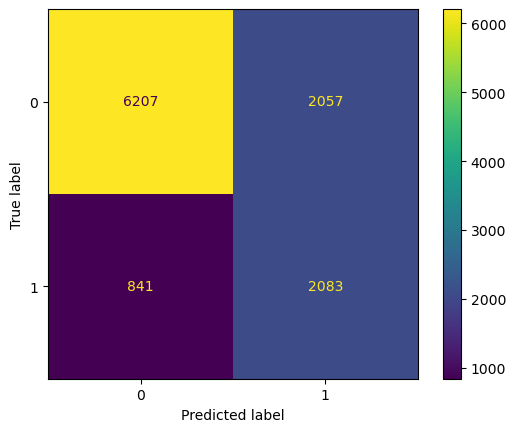

In [426]:
LR_pred = LR.predict(X_test_scaled)
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_Test, LR_pred), display_labels = LR.classes_).plot()
print(classification_report(y_Test,LR_pred))

### 2.2-MLP Classifier
MLP Classifier also used as one of model to train the data. However, this time recall for True labels is not good. It means that model is accurate but it missed many True values.

In [684]:
per= MLPClassifier(random_state=0, max_iter=5, tol=1e-6)
model= per.fit(X_train_scaled, y_Train)
y_pred = per.predict(X_test_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


In [668]:
confusion_matrix(y_Test, y_pred)

array([[7957,  307],
       [2485,  439]], dtype=int64)

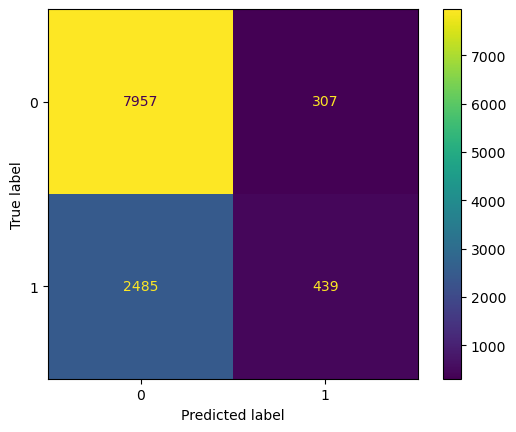

In [669]:
cm = confusion_matrix(y_Test, y_pred)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = per.classes_).plot()

In [683]:
print(classification_report(y_Test,y_pred,zero_division=0.0))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      8264
           1       0.54      0.36      0.43      2924

    accuracy                           0.75     11188
   macro avg       0.67      0.63      0.64     11188
weighted avg       0.73      0.75      0.73     11188



### 2.3-Gradient Boosting and KNN
Some other classifiers such as Gredient Boosting and KNN have been implemented for this classification problem. However, they did not provide high. score again

In [590]:
Forest = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train_scaled, y_Train)
Forest_pred = Forest.predict(X_test_scaled)
print(classification_report(y_Test,Forest_pred,zero_division=0.0))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      8264
           1       0.54      0.47      0.51      2924

    accuracy                           0.76     11188
   macro avg       0.68      0.67      0.67     11188
weighted avg       0.75      0.76      0.75     11188



In [623]:
KNN = KNeighborsClassifier(n_neighbors=20).fit(X_train_scaled, y_Train)
KNN_pred = KNN.predict(X_test_scaled)
print(classification_report(y_Test,KNN_pred,zero_division=0.0))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80      8264
           1       0.47      0.62      0.54      2924

    accuracy                           0.72     11188
   macro avg       0.66      0.69      0.67     11188
weighted avg       0.75      0.72      0.73     11188



# Ensemble Learning
Ensemble of models wil take advantage of different models and combine them together to provide the best result. VotingClassifier used as an Ensembler to combine different models which were instantiated before. The best combination is ensembling LogisticRegression and KNN together. Ensemble of these models provide the best precision for True labels and best accuracy among all models. However, still the best precision for False labelled has been provided by the single LogisticRegression model.

In [661]:
from sklearn.ensemble import VotingClassifier # For Ensemble Learning
ensemble = VotingClassifier(estimators=[
    #('pc', per),
    #('svm', classifier), !Danger. using this model in ensembler cost too much
    ('lr', LR),
    #('rf', Forest),
    ('knn', KNN),
], voting='soft')

ensemble.fit(X_train_scaled, y_Train)
ensemble_pred = ensemble.predict(X_test_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.83      0.86      0.84      8264
           1       0.55      0.50      0.53      2924

    accuracy                           0.76     11188
   macro avg       0.69      0.68      0.69     11188
weighted avg       0.76      0.76      0.76     11188



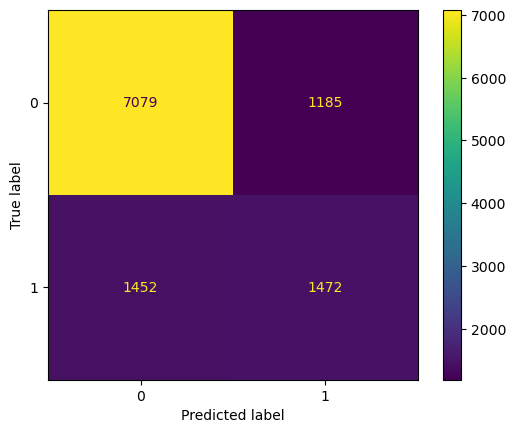

In [662]:
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_Test, ensemble_pred), display_labels = ensemble.classes_).plot()
print(classification_report(y_Test,ensemble_pred))

# Conclusion
For classifying this bank dataset different solution is suggested. The LogisticRegression model provided good recall which means proportion correctly prediction compare to true labels is high. However, Precision of model for True labelled rows is 50% which means the model can only predict half of True labelled rows as True prediction and it miss the other 50% of it. In order to receive better precision for True labelled rows and best accuracy, Ensemble Learning approach is suggested.

# References
Vinod Kumar G R. (2024) Standardization and Normalization Techniques in Machine Learning: StandardScaler(), MinMaxScaler(), Normalizer()&RobustScaler() at: https://medium.com/@vinodkumargr/07-standardization-and-normalization-techniques-in-machine-learning-standardscaler-3890a89bddbf (Accessed: 
Jan 6, 2024).